In [1]:
!pip install opencv-python

In [2]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np

#  Image Negative Transformation

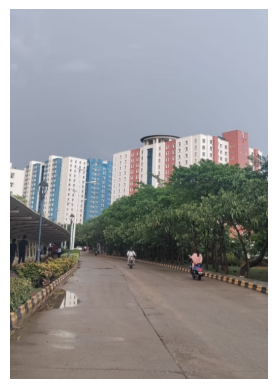

In [3]:
image = cv2.imread("VIT.jpg")

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image_rgb)
plt.axis('off')  
plt.show()

In [4]:
# Get the number of bits per pixel
bits_per_pixel = image.dtype.itemsize * 8

print(f"Number of bits per pixel: {bits_per_pixel}")

Number of bits per pixel: 8


(-0.5, 511.5, 735.5, -0.5)

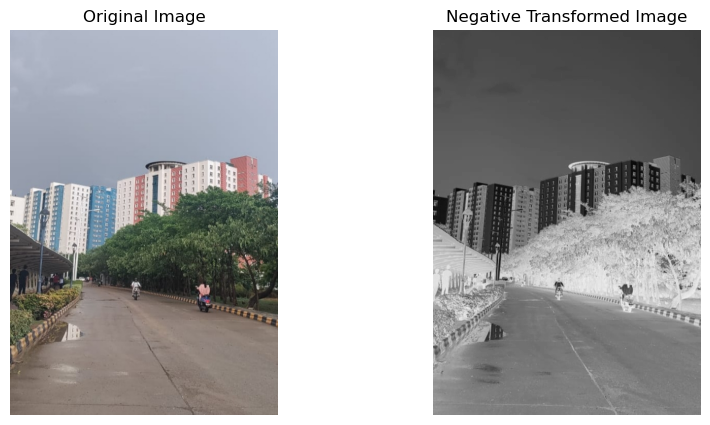

In [5]:
if len(image.shape) > 2:
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
else:
    gray_image = image

L = 2**8
s = L - 1 - gray_image

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(s, cmap='gray', vmin=0, vmax=255)
plt.title('Negative Transformed Image')
plt.axis('off')

# Gamma Correction

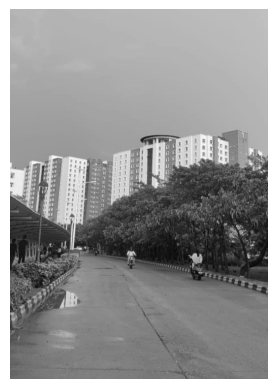

In [6]:
# Convert the image to grayscale
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Display the grayscale image using matplotlib
plt.imshow(image_gray, cmap='gray')
plt.axis('off')
plt.show()

In [7]:
# Function to apply gamma correction
def apply_gamma_correction(image, gamma):
    # Build a lookup table mapping pixel values [0, 255] to their adjusted gamma values
    lookup_table = np.array([((i / 255.0) ** gamma) * 255 for i in np.arange(0, 256)]).astype("uint8")
    
    # Apply gamma correction using the lookup table
    return cv2.LUT(image, lookup_table)

In [8]:
# Load the grayscale image
image = cv2.imread("VIT_gray.png", cv2.IMREAD_GRAYSCALE)

# Apply gamma correction with different gamma values
gamma_values = [0.5, 1.0, 2.0]
corrected_images = [apply_gamma_correction(image, gamma) for gamma in gamma_values]

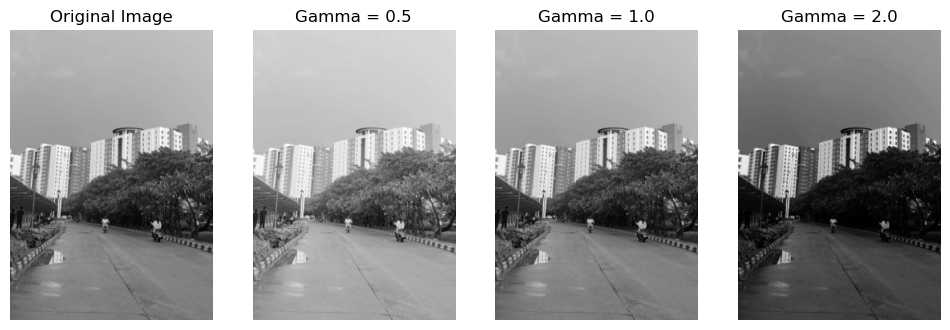

In [9]:
# Display the original and gamma-corrected images
titles = ['Original Image', 'Gamma = 0.5', 'Gamma = 1.0', 'Gamma = 2.0']
images = [image] + corrected_images

plt.figure(figsize=(12, 4))
for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')

plt.show()

# Log Transform

In [10]:
# Function to apply log transformation
def apply_log_transform(image):
    c = 255 / np.log(1 + np.max(image))
    log_transformed = c * (np.log(1 + image + 1e-5))  # Add a small constant to avoid log(0)
    return np.array(log_transformed, dtype=np.uint8)

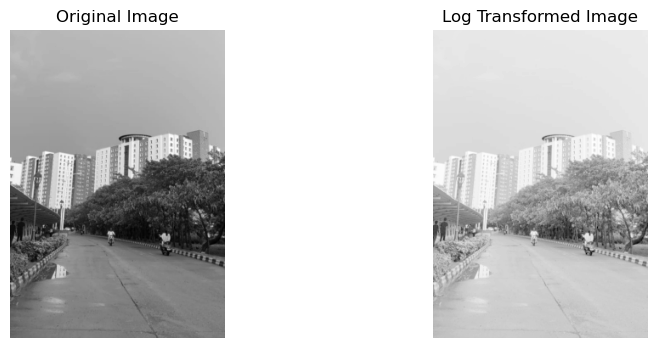

In [11]:
# Load the grayscale image
image = cv2.imread("VIT_gray.png", cv2.IMREAD_GRAYSCALE)

# Apply log transformation
log_transformed_image = apply_log_transform(image)

# Display the original and log-transformed images
plt.figure(figsize=(10, 4))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Log-transformed image
plt.subplot(1, 2, 2)
plt.imshow(log_transformed_image, cmap='gray')
plt.title('Log Transformed Image')
plt.axis('off')

plt.show()

# Compare Transformations

In [12]:
# Function to apply image negative transformation
def apply_negative_transform(image):
    return 255 - image

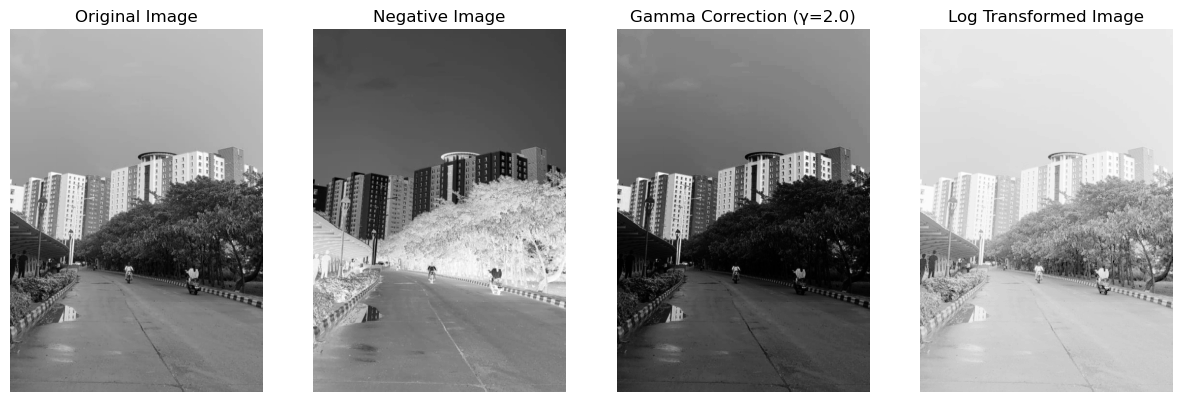

In [13]:
# Load the grayscale image
image = cv2.imread("VIT_gray.png", cv2.IMREAD_GRAYSCALE)

# Apply image negative transformation
negative_image = apply_negative_transform(image)

# Apply gamma correction (γ = 2.0)
gamma_corrected_image = apply_gamma_correction(image, 2.0)

# Apply log transformation
log_transformed_image = apply_log_transform(image)

# Display the original and transformed images
titles = ['Original Image', 'Negative Image', 'Gamma Correction (γ=2.0)', 'Log Transformed Image']
images = [image, negative_image, gamma_corrected_image, log_transformed_image]

plt.figure(figsize=(15, 6))
for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')

plt.show()

# Apply Transformations to Color Images

In [14]:
# Load the color image
image = cv2.imread("VIT.jpg")

# Split the image into its R, G, and B channels
B, G, R = cv2.split(image)

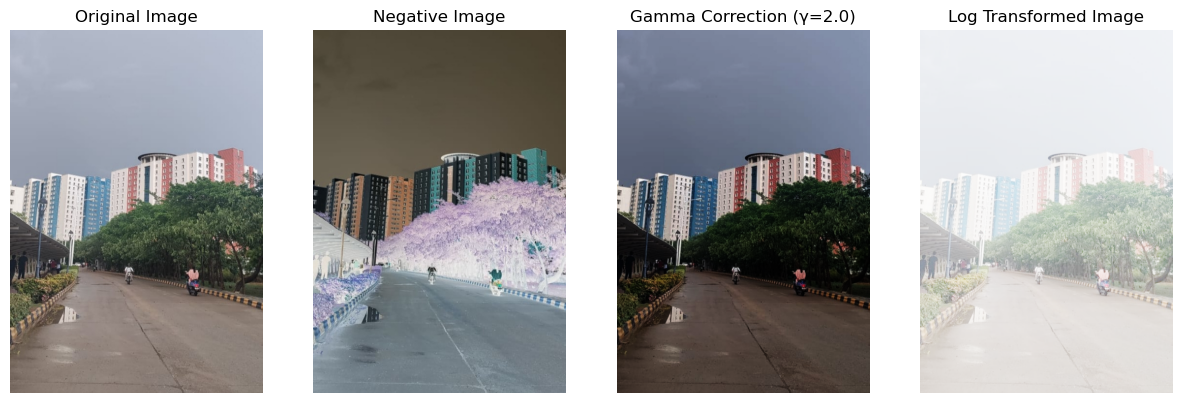

In [15]:
# Apply transformations to each channel
# Image Negative
R_negative = apply_negative_transform(R)
G_negative = apply_negative_transform(G)
B_negative = apply_negative_transform(B)

# Gamma Correction (γ = 2.0)
R_gamma = apply_gamma_correction(R, 2.0)
G_gamma = apply_gamma_correction(G, 2.0)
B_gamma = apply_gamma_correction(B, 2.0)

# Log Transformation
R_log = apply_log_transform(R)
G_log = apply_log_transform(G)
B_log = apply_log_transform(B)

# Merge the channels back together
negative_image = cv2.merge([B_negative, G_negative, R_negative])
gamma_corrected_image = cv2.merge([B_gamma, G_gamma, R_gamma])
log_transformed_image = cv2.merge([B_log, G_log, R_log])

# Display the original and transformed images
titles = ['Original Image', 'Negative Image', 'Gamma Correction (γ=2.0)', 'Log Transformed Image']
images = [image, negative_image, gamma_corrected_image, log_transformed_image]

plt.figure(figsize=(15, 6))
for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    plt.title(titles[i])
    plt.axis('off')

plt.show()